In [2]:
# 라이브러리 설치 
# !pip install matplotlib

In [3]:
import pandas as pd 
import numpy as np 
# 현재 컴퓨터의 os를 확인하기 위한 라이브러리 
import platform
import matplotlib.pyplot as plt

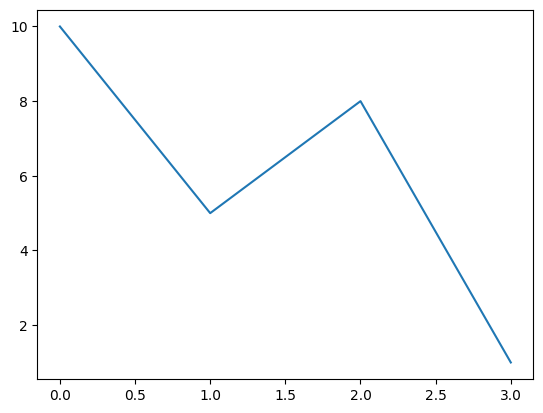

In [4]:
# 라인 그래프 생성 
# case1 : y축의 데이터만 존재하는 경우 
y = [10, 5, 8, 1]
# 라인 그래프를 그려주는 함수 : plot()
plt.plot(y)

plt.show()

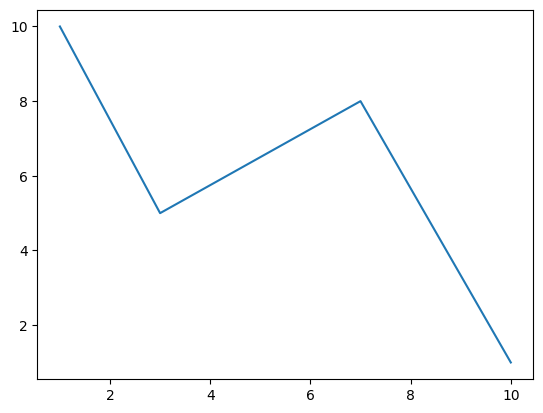

In [5]:
# case2 : x축의 데이터와 y축의 데이터가 모두 존재할때
x = [1,3,7, 10]
y = [10, 5, 8, 1]

plt.plot(x, y)

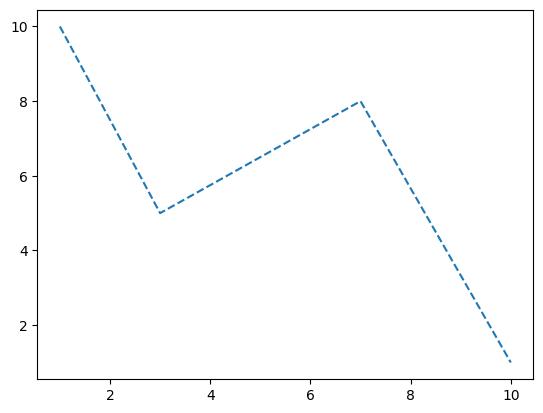

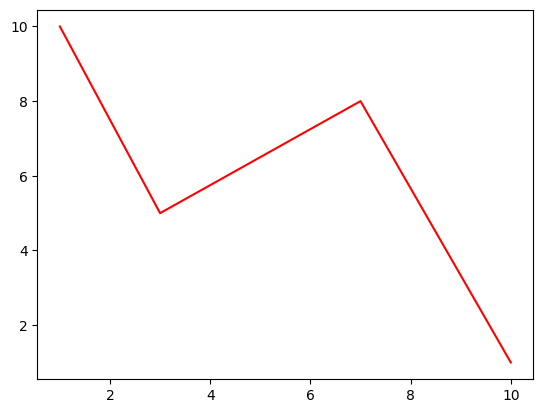

In [6]:
# 선의 종류와 색을 변경 
plt.plot(x, y, '--')
plt.show()
plt.plot(x, y, 'r')
plt.show()

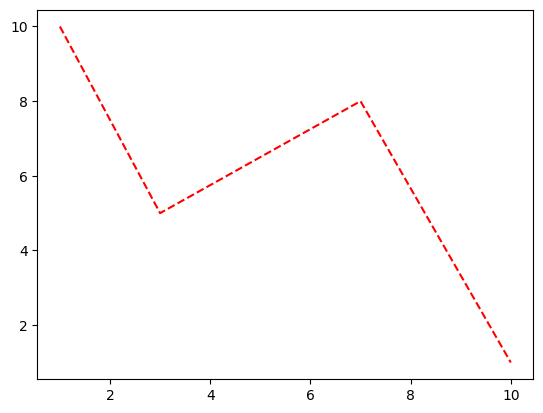

In [7]:
plt.plot(x, y, 'r--')

In [12]:
# matplot에서 한글 깨짐 방지를 위해서 기본 설정 폰트를 변경
# 사용하고 있는 컴퓨터의 os가 MAC인 경우
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

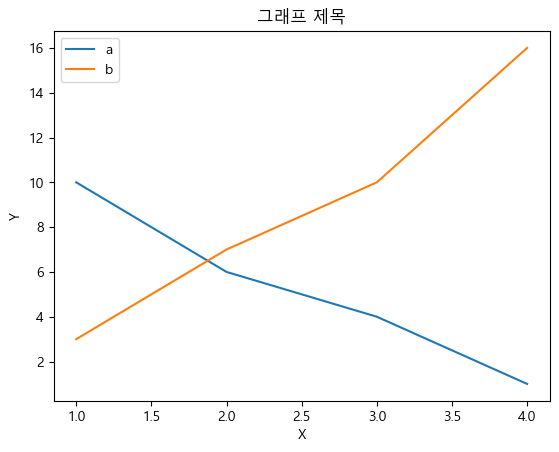

In [13]:
# 하나의 공간의 2개의 라인 그래프 생성 
x = [1,2,3,4]
y = [10, 6, 4, 1]
y2 = [3, 7, 10, 16]
plt.plot(x, y)
plt.plot(x, y2)

# x축의 라벨링
plt.xlabel('X')
# y축의 라벨링
plt.ylabel('Y')
# 그래프 제목
plt.title('그래프 제목')
# 그래프별 범례
plt.legend( ['a', 'b'] )


plt.show()

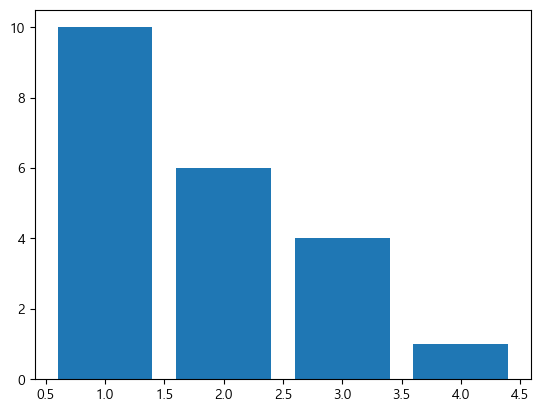

In [ ]:
# 수직 막대 그래프 
plt.bar(x, y)
plt.show()

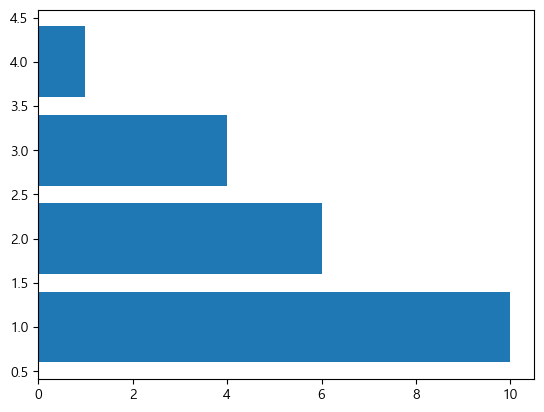

In [16]:
# 수평 막대 그래프 
plt.barh(x, y)
plt.show()

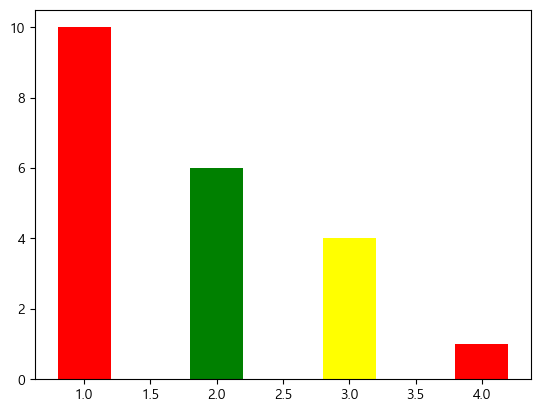

In [18]:
plt.bar(
    x, y, width = 0.4, color = ['red', 'green', 'yellow']
)
plt.show()

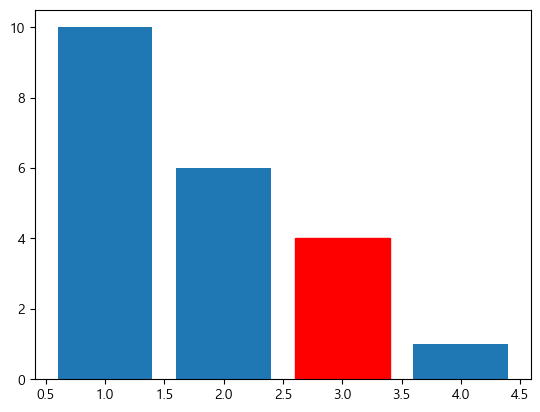

In [22]:
# 막대 그래프에서 특정 막대의 설정을 변경 
bar_graph = plt.bar(x, y)

# bar_graph의 3번째 막대(index 2)를 선택하여 색상을 변경 
bar_graph[2].set_color('r')

plt.show()

In [23]:
# 산점도 그래프 
x = np.random.random(50)
y = np.random.random(50)

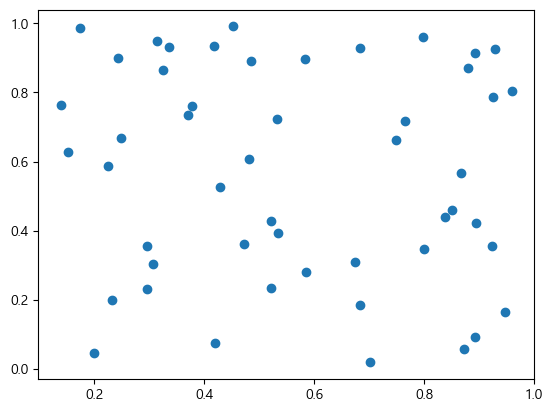

In [24]:
plt.scatter(x, y)

plt.show()

In [25]:
# drinks.csv 데이터 파일 로드 
df = pd.read_csv("../csv/drinks.csv")

In [26]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [28]:
# 피어슨 상관 계수 
df.iloc[ : , 1:-1].corr('pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


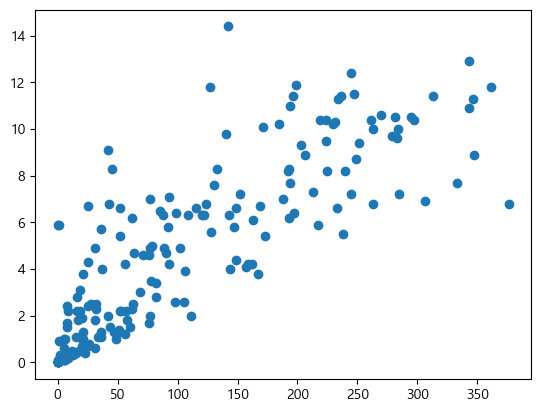

In [29]:
# df에서 맥주 소비량과 순수알콜량의 상관계수가 0.8 이상이다. 
# 산점도 확인 
x = df['beer_servings']
y = df['total_litres_of_pure_alcohol']

plt.scatter(x, y)

plt.show()

1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보를 확인하고 결측치의 존재를 파악 
3. 컬럼의 이름을 변경 -> [국가, 맥주소비량, 증류주소비량, 와인소비량, 순수알콜량, 대륙]
4. 결측치는 대륙 컬럼에 존재 -> 결측치는 'OT' 대체
5. 파생변수 '총술소비량' -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 파생변수 '도수' -> (순수알콜량 / 총술소비량) * 100
7. 대륙별 그룹화를 하고 도수의 평균을 구한다. -> 가장 독한 술을 먹은 대륙은 어디인가?

In [30]:
# 데이터프레임의 정보를 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [32]:
# country 컬럼의 데이터가 고유식별자(primary key)인가?
len(df['country'].unique())

193

In [ ]:
df['country'].value_counts()

In [34]:
# 결측치의 개수를 확인 
# 결측치의 존재 유무 -> bool데이터를 합산
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [35]:
# 기본 통계량 정보
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [36]:
df['continent'].describe()

count     170
unique      5
top        AF
freq       53
Name: continent, dtype: object

In [37]:
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [ ]:
# 컬럼의 이름을 변경 
# case1 : rename() -> 기준의 이름을 재지정 -> 인덱스와 컬럼의 이름은 변경 
df.rename(
    columns = {
        'country' : '국가', 
        'beer_servings' : '맥주소비량', 
        'spirit_servings' : '증류주소비량', 
        'wine_servings' : '와인소비량', 
        'total_litres_of_pure_alcohol' : '순수알콜량', 
        'continent' : '대륙'
    } 
)

In [40]:
# case2 : 데이터프레임 안에 변수 columns에 데이터를 대입 
# 유의 사항 -> 기존 columns의 개수와 대입하는 데이터의 개수가 같아야한다. 
df.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', 
              '순수알콜량', '대륙']

In [41]:
df.head(1)

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS


In [45]:
# 대륙 컬럼의 결측치를 다른 특정 데이터로 대체(교체 // 채워준다)
df['대륙'].replace( np.nan, 'OT' )

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: 대륙, Length: 193, dtype: object

In [48]:
df['대륙'].fillna('OT', inplace=True)

In [49]:
df.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
순수알콜량     0
대륙        0
dtype: int64

In [ ]:
# 파생변수 생성 
df['맥주소비량'] + df['와인소비량'] + df['증류주소비량']

In [56]:
df['총술소비량'] = df.loc[ : ,'맥주소비량' : '와인소비량'].sum(axis=1)